<a href="https://colab.research.google.com/github/sovieski/school_ds_subjects/blob/main/PT08option_code_2022_11_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


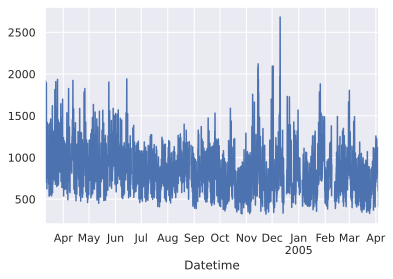

In [74]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt


"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = '/content/data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df['PT08.S3(NOx)'].plot()

In [75]:
PT08 = df['PT08.S3(NOx)'].copy()
PT08.interpolate(inplace=True)

In [76]:
q1 = PT08.quantile(0.25)
median = PT08.quantile(0.5)
q3 = PT08.quantile(0.75)
print(q1, median, q3)

654.0 804.0 968.0


In [77]:
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(upper_fence, lower_fence)

1439.0 183.0


In [78]:
# Visualization setup
%matplotlib
from matplotlib import pyplot as plt
import seaborn; seaborn.set()  # set plot styles
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [10, 5]
plt.ion() # enable the interactive mode

Using matplotlib backend: agg


In [81]:
# Visualize the 'PT08.S3(NOx)' variable
PT08 = df['PT08.S3(NOx)'].copy()
PT08.interpolate(inplace=True)


In [82]:
outliers = PT08.loc[(PT08 > upper_fence) | (PT08 < 0)]
outliers

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

In [83]:
mask = PT08.index.isin(outliers.index)

In [84]:
PT08[~mask]

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9118, dtype: float64

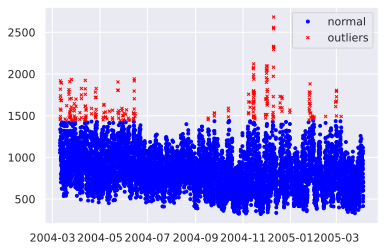

In [85]:
# 이상치 탐지 결과(iqr)
plt.plot(PT08[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


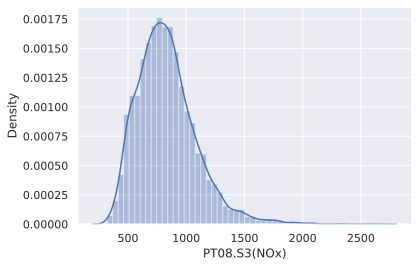

In [86]:
"""
Detecting Outliers with Z-Scores
"""

#z score기반 이상치 탐지
import seaborn as sns
sns.distplot(PT08)
